# 1. Análisis y exploración de los datos
En esta sección cargaremos el conjunto de datos proporcionado y realizaremos un análisis exploratorio.

### 1.1. Carga y exploración del conjunto de datos(dataset)
En este apartado cargaremos el archivo de nuestro dataset (glassdoor_jobs) con pandas, inspeccionaremos su tamaño (filas, columnas), mostraremos las primeras filas para reconocer las columnas disponibles y consultamos un resumen de tipos de datos y ausencia de valores nulos. Esto nos permite entender la estructura general del dataset y confirmar que se ha cargado correctamente

In [8]:
import pandas as pd
import matplotlib.pylab as plt

data = pd.read_csv('Dataset/glassdoor_jobs.csv')

# dimensiones del dataset (filas, columnas)
print('Dimensiones del dataset: ', data.shape)

# primeras 5 filas
data.head() 

Dimensiones del dataset:  (956, 15)


Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  
0                                                 -1  
1                                                 -1  
2                                                 -1  
3  Oak Ridge National Laboratory, National Renewa...  
4               Commerce Signals, Cardlytics, Yodlee

In [10]:
### resumen de tipos de datos y ausencia de nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


### 1.2 Análisis estadístico
Calculamos estadísticas descriptivas básicas para las columnas numericas (Rating y Founded) y contamos cuántas categorías distintas hay en algunas columnas categóricas. El objetivo es conocer rangos, medias, desviaciones estándar y la diversidad de valores en cada campo. Esto nos dará una visión general de cómo están distribuidos los datos antes de ser modelos

In [11]:
# Estadísticas descriptivas de las columnas numéricas
data[['Rating', 'Founded']].describe()

# Número de valores únicos en columnas categóricas seleccionadas
categoricas = ['Company Name', 'Location', 'Headquarters', 'Size',
               'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']
for columna in categoricas:
    print(f"{columna}: {data[columna].nunique()} categorías distintas")

Company Name: 448 categorías distintas
Location: 237 categorías distintas
Headquarters: 235 categorías distintas
Size: 9 categorías distintas
Type of ownership: 13 categorías distintas
Industry: 63 categorías distintas
Sector: 25 categorías distintas
Revenue: 14 categorías distintas
Competitors: 149 categorías distintas


### 1.3 Visualización de distribuciones
En esta sección generamos diversos gráficos para visualizar la distribución de algunas variables.
Primero, hacemos un histograma de las calificaciones (Rating) para ver cómo se reparten las puntuaciones de las empresas. Luego, convertimos la columna "Salary Estimate" en tres columnas numéricas (salario mínimo, máximo y promedio), filtramos las filas con salario válido y creamos un histograma del salario promedio. Finalmente, construimos diagramas de barras para las categorías más frecuentes en "Size", "Type of ownership", "Industry" y Sector, lo que te permite identificar cuáles son los grupos más representados en el dataset.

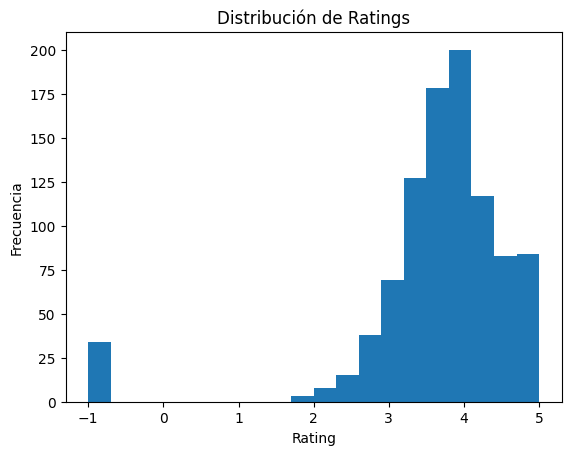

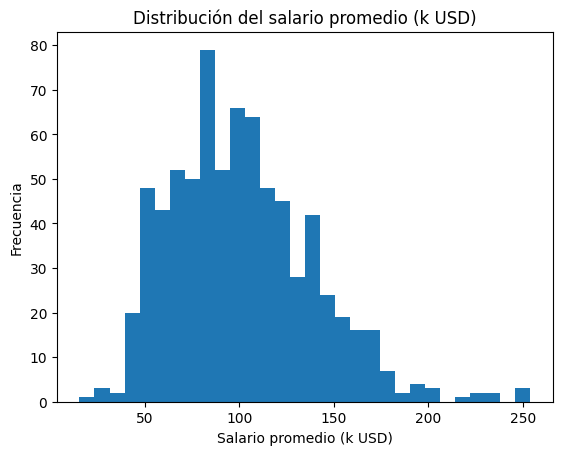

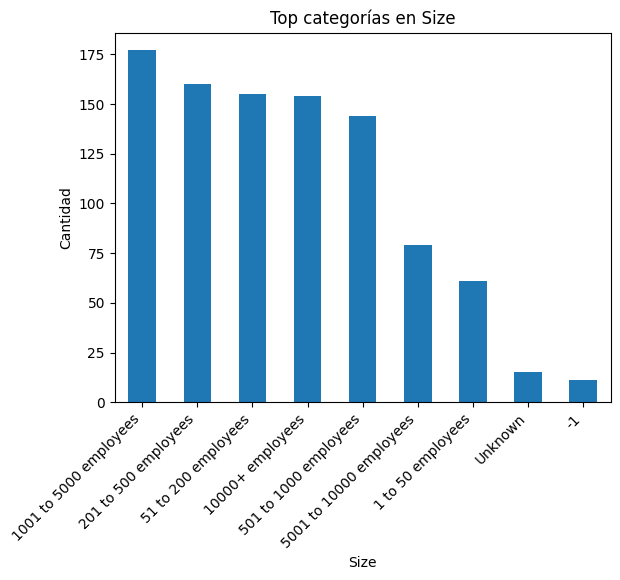

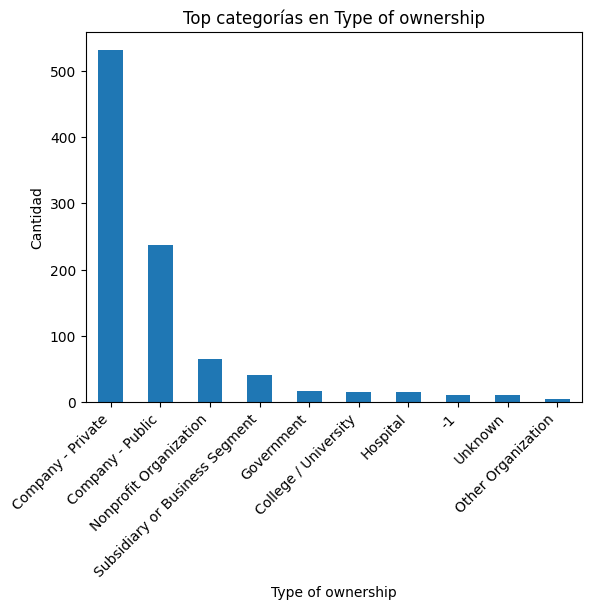

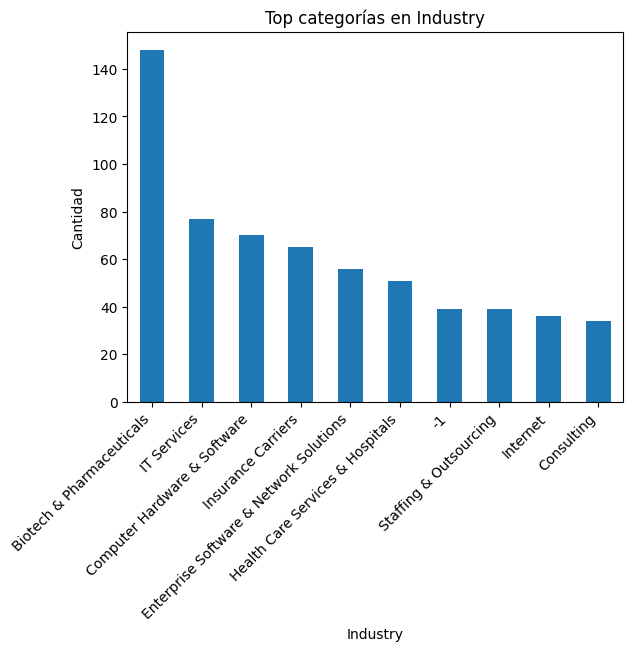

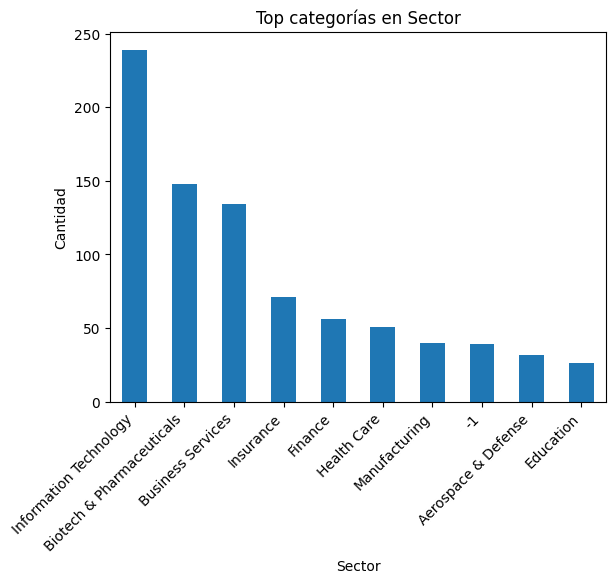

In [12]:
# Histograma de las calificaciones de las empresas
plt.hist(data['Rating'], bins=20)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Convertir la columna 'Salary Estimate' a valores numéricos (mínimo, máximo y promedio)
import numpy as np

def parse_salary(s):
    s = s.lower()
    if s == '-1':
        return (np.nan, np.nan, np.nan)
    # Quitar texto entre paréntesis y etiquetas adicionales
    rango = s.split('(')[0]
    rango = rango.replace('employer provided salary:', '')
    # Detectar si el salario es por hora
    per_hour = 'per hour' in rango
    rango = rango.replace('per hour', '').strip()
    if '-' not in rango:
        return (np.nan, np.nan, np.nan)
    parte_min, parte_max = rango.split('-')
    def to_num(x):
        x = x.replace('$', '').replace('k', '').strip()
        return float(x) if x else np.nan
    minimo = to_num(parte_min)
    maximo = to_num(parte_max)
    # Ajustar salarios por hora a una escala aproximada comparable
    if per_hour:
        minimo *= 2
        maximo *= 2
    promedio = (minimo + maximo) / 2
    return (minimo, maximo, promedio)

# Aplicar la función a la columna original y crear tres nuevas columnas
data[['salario_min', 'salario_max', 'salario_prom']] = data['Salary Estimate'].apply(parse_salary).apply(pd.Series)

# Filtrar datos con salario válido
data_sal = data.dropna(subset=['salario_prom'])

# Histograma del salario promedio (en miles de USD)
plt.hist(data_sal['salario_prom'], bins=30)
plt.title('Distribución del salario promedio (k USD)')
plt.xlabel('Salario promedio (k USD)')
plt.ylabel('Frecuencia')
plt.show()

# Diagramas de barras de las categorías más frecuentes
cols_bar = ['Size', 'Type of ownership', 'Industry', 'Sector']
for col in cols_bar:
    conteo = data[col].value_counts().head(10)
    conteo.plot(kind='bar')
    plt.title(f'Top categorías en {col}')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')
    plt.show()


Interpretación:
- En el histograma de Rating se observa que la mayoría de las empresas tienen calificaciones entre 3 y 4,5. Existe un pequeño grupo con valor –1, lo que indica que esos puestos no cuentan con una valoración disponible.

- En el histograma del salario promedio la mayor densidad se concentra entre 50 kUSD y 150 kUSD. La distribución está sesgada hacia la derecha: hay menos ofertas con salarios muy altos (por encima de 200 kUSD) y algunas pocas por debajo de 50 kUSD, que podrían corresponder a puestos junior o remuneraciones por hora.

- En el diagrama de barras de **Size** predominan las empresas medianas y grandes. Las categorías “201 a 500 empleados”, “501 a 1000 empleados” y “1001 a 5000 empleados” son las más numerosas. Las compañías muy pequeñas (1 a 50 empleados) o con tamaño desconocido aparecen con mucha menor frecuencia.

- En el diagrama de barras de **Type of ownership** se aprecia que la mayoría de las ofertas provienen de compañías privadas, seguidas por compañías públicas. Las organizaciones sin ánimo de lucro, subsidiarias, organismos gubernamentales, hospitales y universidades representan un porcentaje mucho menor.

- En el diagrama de barras de **Industry** el sector más representado es *Biotech & Pharmaceuticals*, seguido de *IT Services* y *Computer Hardware & Software*. También destacan los rubros de seguros, software empresarial y servicios de salud. La categoría “–1” agrupa a aquellas ofertas donde la industria no está especificada.

- En el diagrama de barras de **Sector** se nota un claro predominio de *Information Technology*, con *Biotech & Pharmaceuticals* y *Business Services* en segundo y tercer lugar respectivamente. Otros sectores como *Insurance*, *Finance* o *Health Care* aparecen con menor peso, y existe un conjunto de registros sin sector definido (marcados como “–1”).


### 1.4 Análisis de la variable objetivo
En este ultimo punto de nuestro analisis y exploración de los datos, analizaremos en detalle la variable objetivo (el salario) ya convertida a valores númericos. Calcularemos estadísticas resumidas (media, mínimo, máximo, desviación estándar y cuartiles) para los salarios mínimos, máximos y promedios. Estas métricas permitirán entender el rango y la dispersión del salario antes de entrenar cualquier modelo de predicción

In [14]:
# Estadísticas de los salarios ya convertidos (mínimo, máximo y promedio)
data_sal[['salario_min', 'salario_max', 'salario_prom']].describe()

salario_min  salario_max  salario_prom
count   742.000000   742.000000    742.000000
mean     74.719677   128.149596    101.434636
std      30.980593    45.220324     37.546122
min      15.000000    16.000000     15.500000
25%      52.000000    96.000000     73.500000
50%      69.500000   124.000000     97.500000
75%      91.000000   155.000000    122.500000
max     202.000000   306.000000    254.000000